In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Load and prepare the data
data_path = 'D:\\deep learning\\deep-learning-master\\first-neural-network\\Bike-Sharing-Dataset\\hour.csv'

rides = pd.read_csv(data_path)


In [3]:
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


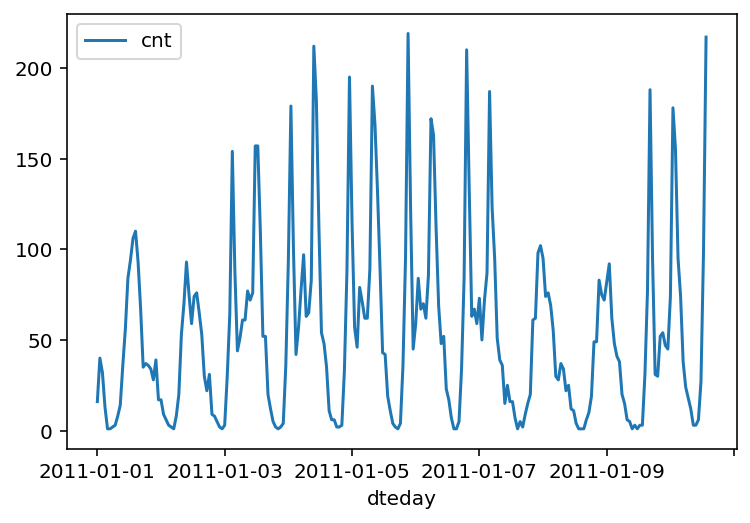

In [4]:
#plot number of bike riders over the first 10 days 
rides[:24*10].plot(x='dteday', y='cnt')

In [5]:
#Dummy variables
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)
# remove some columns
fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = rides.drop(fields_to_drop, axis=1)
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
#Scaling target variables
# for quantity features
quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

In [7]:
#Splitting the data into training, testing, and validation sets
# Save data for approximately the last 21 days for testing 
test_data = data[-21*24:]

# Now remove the test data from the data set 
data = data[:-21*24]

# Separate the data into features and targets
target_fields = ['cnt', 'casual', 'registered']
features, targets = data.drop(target_fields, axis=1), data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]

# Hold out the last 60 days or so of the remaining data as a validation set
train_features, train_targets = features[:-60*24], targets[:-60*24]
val_features, val_targets = features[-60*24:], targets[-60*24:]

In [8]:
from my_answers import NeuralNetwork

In [9]:
#calculate mean squared error
def MSE(y, Y):
    return np.mean((y-Y)**2)

In [10]:
#For test code
import unittest
inputs = np.array([[0.5, -0.2, 0.1]])
targets = np.array([[0.4]])
test_w_i_h = np.array([[0.1, -0.2],
                       [0.4, 0.5],
                       [-0.3, 0.2]])
test_w_h_o = np.array([[0.3],
                       [-0.1]])

class TestMethods(unittest.TestCase):
    
    ##########
    # Unit tests for data loading
    ##########
    
    def test_data_path(self):
        # Test that file path to dataset has been unaltered
        self.assertTrue(data_path.lower() == 'd:\\deep learning\\deep-learning-master\\first-neural-network\\bike-sharing-dataset\\hour.csv')
        
    def test_data_loaded(self):
        # Test that data frame loaded
        self.assertTrue(isinstance(rides, pd.DataFrame))
    
    ##########
    # Unit tests for network functionality
    ##########

    def test_activation(self):
        network = NeuralNetwork(3, 2, 1, 0.5)
        # Test that the activation function is a sigmoid
        self.assertTrue(np.all(network.activation_function(0.5) == 1/(1+np.exp(-0.5))))

    def test_train(self):
        # Test that weights are updated correctly on training
        network = NeuralNetwork(3, 2, 1, 0.5)
        network.weights_input_to_hidden = test_w_i_h.copy()
        network.weights_hidden_to_output = test_w_h_o.copy()
        
        network.train(inputs, targets)
        self.assertTrue(np.allclose(network.weights_hidden_to_output, 
                                    np.array([[ 0.37275328], 
                                              [-0.03172939]])))
        self.assertTrue(np.allclose(network.weights_input_to_hidden,
                                    np.array([[ 0.10562014, -0.20185996], 
                                              [0.39775194, 0.50074398], 
                                              [-0.29887597, 0.19962801]])))

    def test_run(self):
        # Test correctness of run method
        network = NeuralNetwork(3, 2, 1, 0.5)
        network.weights_input_to_hidden = test_w_i_h.copy()
        network.weights_hidden_to_output = test_w_h_o.copy()

        self.assertTrue(np.allclose(network.run(inputs), 0.09998924))

suite = unittest.TestLoader().loadTestsFromModule(TestMethods())
unittest.TextTestRunner().run(suite)


.....
----------------------------------------------------------------------
Ran 5 tests in 0.094s

OK


<unittest.runner.TextTestResult run=5 errors=0 failures=0>

In [78]:
import sys

####################
### Set the hyperparameters in you myanswers.py file ###
####################

from my_answers import iterations, learning_rate, hidden_nodes, output_nodes


N_i = train_features.shape[1]
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}
for ii in range(iterations):
    # Go through a random batch of 128 records from the training data set
    batch = np.random.choice(train_features.index, size=128)
    X, y = train_features.iloc[batch].values, train_targets.iloc[batch]['cnt']
                             
    network.train(X, y)
    
    # Printing out the training progress
    train_loss = MSE(network.run(train_features).T, train_targets['cnt'].values)
    val_loss = MSE(network.run(val_features).T, val_targets['cnt'].values)
    print("\rProgress: {:2.1f}".format(100 * ii/float(iterations)))
    print("% ... Training loss: ",train_loss)
    print( " ... Validation loss: " ,val_loss)
    sys.stdout.flush()
    
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)

Progress: 0.0
% ... Training loss:  1.4705884931901174
 ... Validation loss:  1.438295112547102
Progress: 0.2
% ... Training loss:  3.3618868659273806
 ... Validation loss:  4.814954440512339
Progress: 0.4
% ... Training loss:  9.599721647814171
 ... Validation loss:  8.119716394665245
Progress: 0.6
% ... Training loss:  26.935377926236992
 ... Validation loss:  30.254582193099584
Progress: 0.8
% ... Training loss:  29.427789068109604
 ... Validation loss:  23.58985915858483
Progress: 1.0
% ... Training loss:  1.9643608028822506
 ... Validation loss:  2.782666817636207
Progress: 1.2
% ... Training loss:  1.0291301880934167
 ... Validation loss:  1.685470978428535
Progress: 1.4
% ... Training loss:  0.9374117554920242
 ... Validation loss:  1.5192355913655184
Progress: 1.6
% ... Training loss:  0.9129635331200882
 ... Validation loss:  1.4581134871330446
Progress: 1.8
% ... Training loss:  0.9038902982378694
 ... Validation loss:  1.4327478441115664
Progress: 2.0
% ... Training loss:  0

Progress: 17.0
% ... Training loss:  0.6039892267684198
 ... Validation loss:  0.9865925953684211
Progress: 17.2
% ... Training loss:  0.6032333333438488
 ... Validation loss:  0.9650507959953418
Progress: 17.4
% ... Training loss:  0.6038862333587907
 ... Validation loss:  0.9511992571959045
Progress: 17.6
% ... Training loss:  0.5942347790559632
 ... Validation loss:  0.9699875664808927
Progress: 17.8
% ... Training loss:  0.6018048088797465
 ... Validation loss:  0.9291636328561156
Progress: 18.0
% ... Training loss:  0.5877783665275055
 ... Validation loss:  0.9532309605392183
Progress: 18.2
% ... Training loss:  0.5860903399505947
 ... Validation loss:  0.9693077405572059
Progress: 18.4
% ... Training loss:  0.5827575226050307
 ... Validation loss:  0.9619736657917961
Progress: 18.6
% ... Training loss:  0.5802599572201995
 ... Validation loss:  0.9554949352608181
Progress: 18.8
% ... Training loss:  0.588969227589448
 ... Validation loss:  0.9221138610031628
Progress: 19.0
% ... 

Progress: 33.8
% ... Training loss:  0.38080280590708676
 ... Validation loss:  0.6511732788669473
Progress: 34.0
% ... Training loss:  0.3785795932750105
 ... Validation loss:  0.6499490615603065
Progress: 34.2
% ... Training loss:  0.3717368118169344
 ... Validation loss:  0.6418349705324375
Progress: 34.4
% ... Training loss:  0.37021265276327653
 ... Validation loss:  0.640566168151894
Progress: 34.6
% ... Training loss:  0.37023239226360183
 ... Validation loss:  0.6323663670048919
Progress: 34.8
% ... Training loss:  0.3688438586257343
 ... Validation loss:  0.6273020444890537
Progress: 35.0
% ... Training loss:  0.37194356768171805
 ... Validation loss:  0.6309113131818307
Progress: 35.2
% ... Training loss:  0.36182370244859874
 ... Validation loss:  0.6248071371489955
Progress: 35.4
% ... Training loss:  0.3647042367951568
 ... Validation loss:  0.6308828564440645
Progress: 35.6
% ... Training loss:  0.35959136827678173
 ... Validation loss:  0.6240648554899633
Progress: 35.8


Progress: 50.6
% ... Training loss:  0.3126496678639921
 ... Validation loss:  0.5216052236956634
Progress: 50.8
% ... Training loss:  0.2916610972804761
 ... Validation loss:  0.5050939403139665
Progress: 51.0
% ... Training loss:  0.28933292780163694
 ... Validation loss:  0.5019091733353308
Progress: 51.2
% ... Training loss:  0.30648292573622954
 ... Validation loss:  0.4956779281884897
Progress: 51.4
% ... Training loss:  0.2864303230484302
 ... Validation loss:  0.4839639002865542
Progress: 51.6
% ... Training loss:  0.28905919469305913
 ... Validation loss:  0.49696726715934797
Progress: 51.8
% ... Training loss:  0.2878489373400305
 ... Validation loss:  0.4830702439191234
Progress: 52.0
% ... Training loss:  0.30108616558277673
 ... Validation loss:  0.5050789572107827
Progress: 52.2
% ... Training loss:  0.28626685851142164
 ... Validation loss:  0.4804326059232515
Progress: 52.4
% ... Training loss:  0.28591622364321095
 ... Validation loss:  0.4932233464637634
Progress: 52.

Progress: 67.2
% ... Training loss:  0.27296894063001753
 ... Validation loss:  0.4610062991548934
Progress: 67.4
% ... Training loss:  0.2712864649229133
 ... Validation loss:  0.4541036749521502
Progress: 67.6
% ... Training loss:  0.2715759765187448
 ... Validation loss:  0.4439208475438933
Progress: 67.8
% ... Training loss:  0.2693888730892156
 ... Validation loss:  0.4547752301737363
Progress: 68.0
% ... Training loss:  0.28504635740591344
 ... Validation loss:  0.44393279712652983
Progress: 68.2
% ... Training loss:  0.27827489633348396
 ... Validation loss:  0.4631213813481269
Progress: 68.4
% ... Training loss:  0.2780265543181712
 ... Validation loss:  0.44369016569899344
Progress: 68.6
% ... Training loss:  0.2709103106474744
 ... Validation loss:  0.4537384387122843
Progress: 68.8
% ... Training loss:  0.26973329180801237
 ... Validation loss:  0.44931031383661346
Progress: 69.0
% ... Training loss:  0.26971874374204846
 ... Validation loss:  0.45952340013354154
Progress: 6

Progress: 83.8
% ... Training loss:  0.2659407984606963
 ... Validation loss:  0.45249603691291856
Progress: 84.0
% ... Training loss:  0.2646260868427701
 ... Validation loss:  0.4490135501222613
Progress: 84.2
% ... Training loss:  0.26273905501144146
 ... Validation loss:  0.43990039786557633
Progress: 84.4
% ... Training loss:  0.2691591919535092
 ... Validation loss:  0.43739992238935327
Progress: 84.6
% ... Training loss:  0.26263071852174996
 ... Validation loss:  0.4529826441153117
Progress: 84.8
% ... Training loss:  0.30005795034315175
 ... Validation loss:  0.45397452857747056
Progress: 85.0
% ... Training loss:  0.27211676908991494
 ... Validation loss:  0.45446671991319254
Progress: 85.2
% ... Training loss:  0.2630024920694744
 ... Validation loss:  0.446997062006616
Progress: 85.4
% ... Training loss:  0.2615638901439301
 ... Validation loss:  0.44948034103051177
Progress: 85.6
% ... Training loss:  0.26059170488910954
 ... Validation loss:  0.4431785233403747
Progress: 

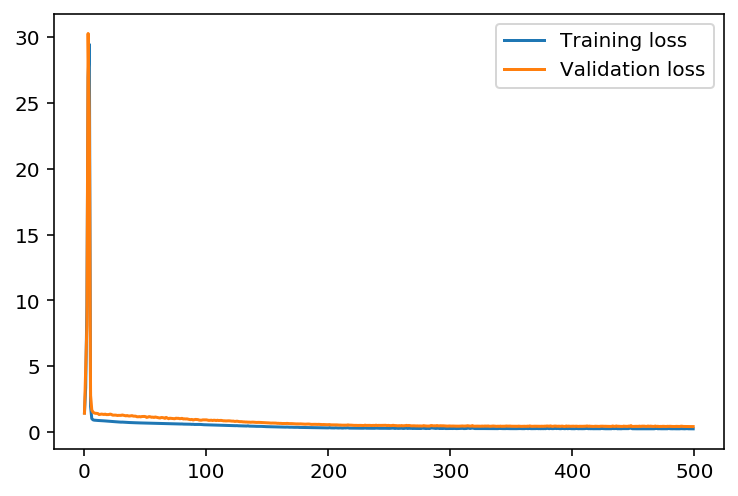

In [79]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
_ = plt.ylim()

In [64]:
with open('C:\\Users\\Asus\\Untitled Folder 2\\fristmodel_two.npy', 'wb') as f:
    np.save(f,network.weights_input_to_hidden)
    np.save(f,network.weights_hidden_to_output)

In [65]:
with open('C:\\Users\\Asus\\Untitled Folder 2\\fristmodel_two.npy', 'rb') as f:
    a = np.load(f)
    b = np.load(f)
print(a) 
print(b)

[[-0.30795646  0.09395947  0.18161189]
 [ 0.1335676   0.08658896  0.13837305]
 [-0.54918437  0.22283202  0.40078344]
 [ 0.2750096   0.06314404  0.15588174]
 [-0.17487527  0.04606999  0.01020757]
 [-0.01863328 -0.01263138  0.09802132]
 [-0.01402233 -0.24307089  0.0615155 ]
 [-0.21075797  0.10423935 -0.1231564 ]
 [ 0.07143642  0.00313062  0.17812625]
 [ 0.01993139 -0.02869916  0.11332075]
 [-0.15842345 -0.14357506 -0.08675555]
 [ 0.03001815 -0.05365954 -0.04396445]
 [ 0.07009872  0.17154802 -0.01934133]
 [-0.06317311  0.01942125 -0.17714502]
 [ 0.13483911 -0.01472795  0.18018366]
 [ 0.10711301 -0.17268192  0.13738422]
 [ 0.07930008 -0.26098986  0.0719559 ]
 [-0.12898227  0.15609749  0.1769438 ]
 [-0.16562283 -0.07395305  0.03165076]
 [-0.08199313 -0.00216399  0.00654094]
 [-0.15856371  0.15360288 -0.03177723]
 [ 0.06128152  0.09727644 -0.06963707]
 [-0.20022215 -0.01782503 -0.17976015]
 [ 0.15039697  0.02375795  0.00320771]
 [ 0.01624314  0.15328476 -0.16254617]
 [ 0.0441111  -0.25129361

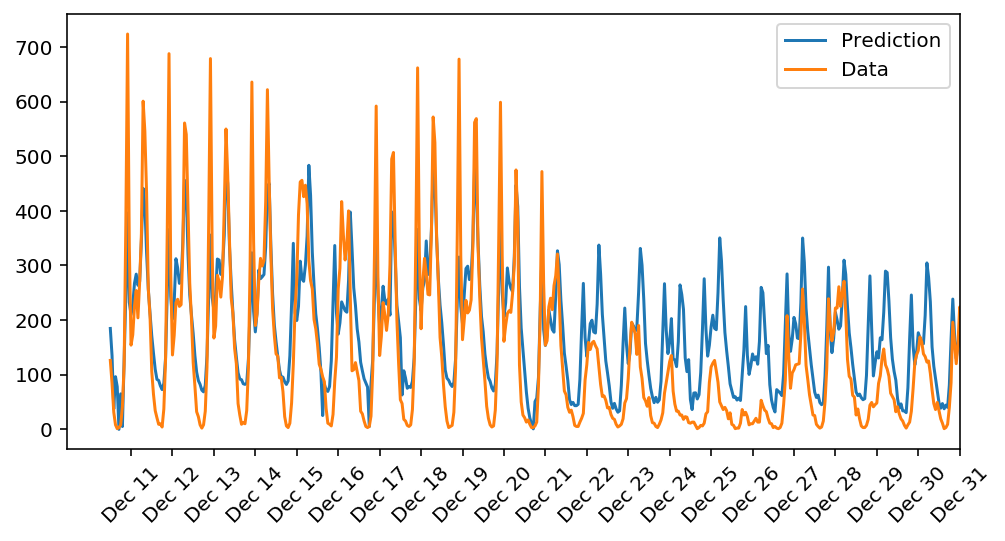

In [80]:
#using the test data to view how well your network is modeling the data.

fig, ax = plt.subplots(figsize=(8,4))

mean, std = scaled_features['cnt']
predictions = network.run(test_features).T*std + mean
ax.plot(predictions[0], label='Prediction')
ax.plot((test_targets['cnt']*std + mean).values, label='Data')
ax.set_xlim(right=len(predictions))
ax.legend()

dates = pd.to_datetime(rides.iloc[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)